# Bevezetés a scipy csomgba és további numpy függvények 

A [scipy](https://www.scipy.org/) egy numpy-on alapuló python csomag, mely rengeteg, néhány esetben numpy-ban is megtalálható, funkciót implementál. Elsősorban jelfeldolgozó, numerikus integráló és optimalizáló algoritmusok, speciális függvények (pl. Bessel-függvény) találhatóak meg benne.

A [scipy.io](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html) alcsomag segítségével lehetséges Matlab által írható és olvasható bináris fájlok (`*.mat` fájlok) írása olvasása, így a Pythonban kiszámított eredmények könnyen exportálhatóak és tovább lehet velük dolgozni Matlabban, és fordítva.

## Mátrixok és vektorok létrehozása

A numpy jegyzetben láttuk, hogyan lehet a numpy-ban mátrixot vagy vektort létrehozni:

In [1]:
import numpy as np

In [12]:
a = np.array((1,2,3))
a

array([1, 2, 3])

A mátrixok, vektorok létrehozásához és összefűzéséhez a numpy biztosít egy alternatív módszert, ami valamelyest hasonlít a Matlab-ban már megszokott szintaxishoz. A fenti vektort a következőképpen is létre lehet hozni:  

In [2]:
# sorvektor
b = np.r_[1, 2, 3]
b, b.shape

(array([1, 2, 3]), (3,))

In [3]:
# oszlopvektor
c = np.c_[1, 2, 3]
c, c.shape

(array([[1, 2, 3]]), (1, 3))

A fenti módszer segítségével mátrixokat is létre tudunk hozni:

Két vektor össefűzése mátrixszá oszlopok mentén

In [4]:
np.c_[[1, 2, 3], [4, 5, 6]]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [10]:
np.c_[[1, 2], [3, 4], [5, 6]]

array([[1, 3, 5],
       [2, 4, 6]])

In [11]:
np.c_[[1, 2, 3], [4, 5, 6]].T

array([[1, 2, 3],
       [4, 5, 6]])

Két vektor össefűzése sorvektorrá

In [5]:
np.r_[(1, 2, 3), (4, 5, 6)]

array([1, 2, 3, 4, 5, 6])

Két vektor össefűzése sorvektorrá és float-á konvertálása:

In [8]:
np.r_[(1, 2, 3), (4, 5, 6)].astype(float).reshape((2,3))

array([[1., 2., 3.],
       [4., 5., 6.]])

Korábban definiált változók is felhasználhatóak.

In [7]:
a, b

NameError: name 'a' is not defined

In [13]:
np.r_[a, b]

array([1, 2, 3, 1, 2, 3])

In [14]:
np.c_[a, b]

array([[1, 1],
       [2, 2],
       [3, 3]])

Egyenlő lepésközű vektor létrehozása (`j` a komplex egység - jelen esetben azt jelzi, hogy 10 elemet kell tartalmazzon a létrejövő vektor):

In [15]:
20j

20j

In [16]:
10 + 20j

(10+20j)

In [17]:
np.r_[0:10:3]

array([0, 3, 6, 9])

In [22]:
np.arange(0, 10, 3)

array([0, 3, 6, 9])

In [19]:
np.r_[0:12:3j]

array([ 0.,  6., 12.])

In [23]:
np.linspace(0, 12, 3)

array([ 0.,  6., 12.])

In [17]:
# oszlopvektor formátum
np.c_[0:5:6j]

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

## FFT (Fast Fourier Transform) azaz Gyors Fourier-transzformáció

Bizonyára találkoztatok, már a FT-vel (Fourier-transzformációval), annak elméletével, gyakorlati hasznával. Markáns periodicitást egy adatsorban a FT segítségével detektálhatunk. Nagy frekvenciás zajok kiszúrése, az adatsorunk konvolúciója egy adott függvénymaggal, mind a FT segítségével tehető meg.

Nézzünk meg, hogyan lehet a scipy segítségével elvégezni ezt a transzformációt.

In [36]:
import scipy
from scipy import ndimage

In [24]:
from scipy import fftpack as fft
import matplotlib.pyplot as plt

### Szintetikus példa

Először készítsünk egy szintetikus adatsort. Az adatsort a $g(x) = C + A_1 sin(2 \pi f_1 x) + A_2 sin(2 \pi f_2 x)$ függvény mintavételezésével fogjuk elkészíteni.

In [40]:
# f_1 és f_2 frekvencia
fr = np.r_[5, 10]
fr

array([ 5, 10])

In [43]:
# körfrekvenciák
fr_omega = fr * 2 * np.pi

In [44]:
fr_omega

array([31.41592654, 62.83185307])

In [45]:
fr

array([ 5, 10])

In [46]:
# a g függvény implementációja
def two_sin(x, a, c, f):
    return c + a[0] * np.sin(2 * np.pi * f[0] * x) + a[1] * np.sin(2 * np.pi * f[1] * x)

In [118]:
# x és y = g(x) értékek előállítása
x = np.r_[0:2 * np.pi:1000j]
c = 2.5
y = two_sin(x, c=c, f=fr, a=(1.5, 1.0))
sig_y = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)

A függvény mintevételezési frekvenciája a lépésköz inverze. (Késöbb érdekes lesz.)

In [108]:
dx = (x[1] - x[0])
fs = 1 / dx
fs

79.49789407440173

In [50]:
# segédfüggvény
def plotxy(*args, xlabel="x", ylabel="y", title="", dpi=150, size=(5,3), xrange=None, yrange=None, **kwargs):
    f = plt.figure(dpi=dpi, figsize=size)

    plt.plot(*args, **kwargs)
    
    if xrange is not None:
        plt.xlim(xrange)

    if yrange is not None:
        plt.ylim(yrange)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

A $g(x)$ függvény ábrázolva:

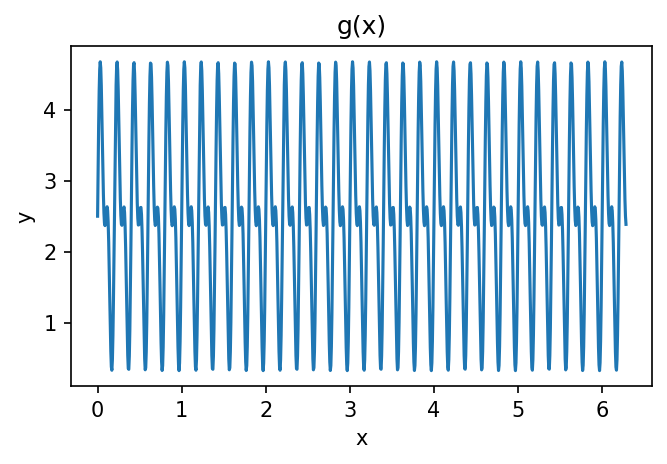

In [119]:
plotxy(x, y, title="g(x)")

A függvényértékek átlaga értelemszerűen a konstans $C$ értékéhez közeli.

In [93]:
y.mean(), c

(2.5026393368471416, 2.5)

Hajtsuk végre a transzformációt.

In [94]:
ty = fft.fft(y)

In [95]:
ty[:10]

array([2502.63933685-0.j        ,    2.63959939+0.04783519j,
          2.64038768+0.09573038j,    2.6417037 +0.14374584j,
          2.64355078+0.19194244j,    2.6459336 +0.24038193j,
          2.64885826+0.28912726j,    2.65233227+0.33824286j,
          2.65636468+0.38779504j,    2.66096606+0.43785231j])

Az $y$ értékek transzformálása után hozzuk létre a transzformált $y$ értékekhez tartozó frekvencia értékeket. Ezt az `fftfreq` függvény segítségével tehetjük meg.

In [96]:
fx = fft.fftfreq(
    ty.shape[0], # transzformált értékek darabszáma
    dx       # eredeti értékek mintavételezési lépésköze 
)

Transzformált értékek abszolút értéke ábrázolva. (A FT általános esetben egy komplex számokat tartalmazó vektort eredényez, ennek most csak az abszolút értékét ábrázoljuk.)

In [33]:
s = r"a,b,c\nd,e,f"
print(s)

a,b,c\nd,e,f


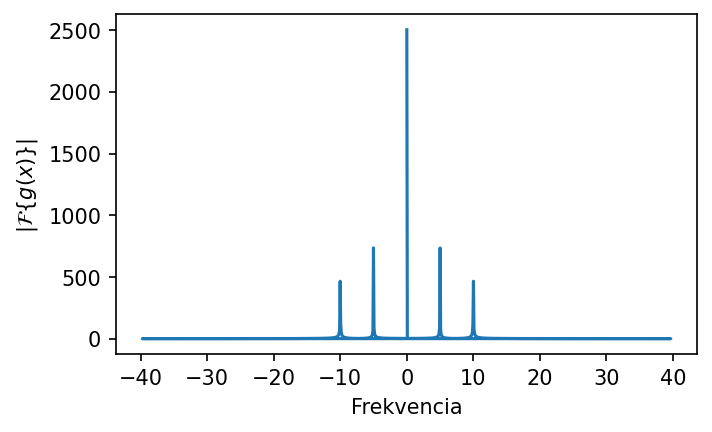

In [98]:
plotxy(fx, np.abs(ty), "-", xlabel="Frekvencia", ylabel=r"$|\mathcal{F}\{g(x)\}|$");

In [102]:
sfx, sty = fft.fftshift(fx), fft.fftshift(ty)

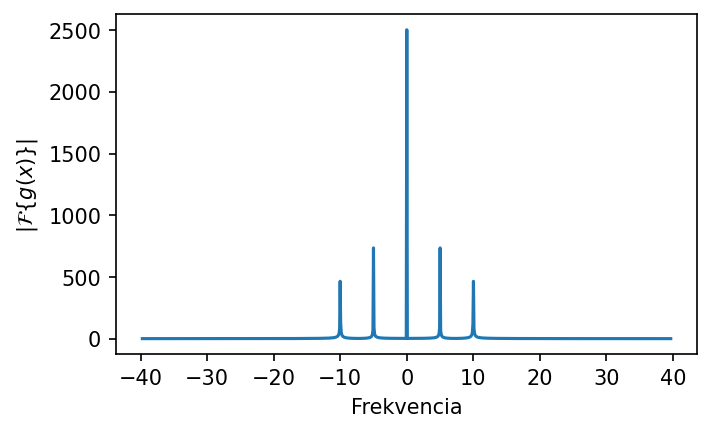

In [103]:
plotxy(sfx, np.abs(sty), "-", xlabel="Frekvencia", ylabel="$|\mathcal{F}\{g(x)\}|$");

In [104]:
fr

array([ 5, 10])

Nagyított ábra.

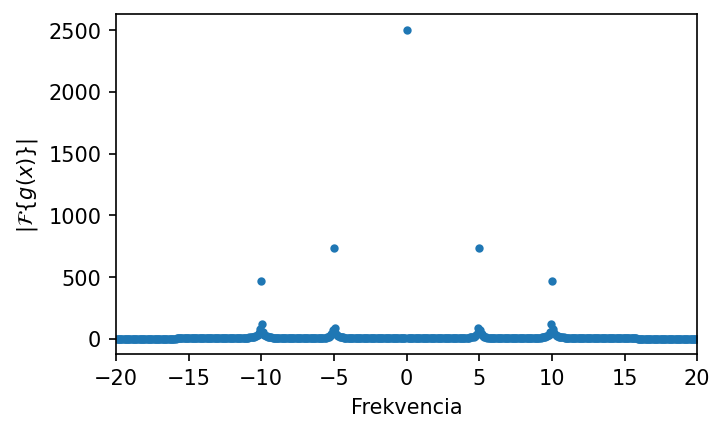

In [105]:
plotxy(sfx, np.abs(sty), ".", xlabel="Frekvencia", ylabel=r"$|\mathcal{F}\{g(x)\}|$", xrange=(-20, 20));

In [26]:
fr

array([ 5, 10])

Láthatjuk, hogy a transzformált értékek csúcsai az eredeti frekvencia-értékekkel egybeesnek. A FT egy másik tulajdonságát is megfigyelhetjük. A frekvencia-spektrum szimmetrikus.

Esetünkben a mintavételezési frekvencia nagyobb volt mint a mintavételezett függvény legnagyobb frekvenciájú "elem" frekvenciájának kétszerese, így a frekvencia spektrum rekonstruálható volt.

In [110]:
print("Mintavételezési frekvencia: %g.\nA két frekvencia közül a nagyobbnak a kétszerese: %g" %
      (fs * 2 * np.pi, max(fr) * 2 * 2 * np.pi))

Mintavételezési frekvencia: 499.5.
A két frekvencia közül a nagyobbnak a kétszerese: 125.664


### Rövid kitérő: tetszőleges számú függvényargumentum

Definiáljunk egy segédfüggvényt. Ez a függvény a kapott $x$ és $y$ adatsort ábrázolja, végrehajtja a FT-t és ábrázojla annak eredményét. A `plotxy` függvény számos opcionális argumentumát szeretnénk továbbítani az fft_plot függvényen belül a `plotxy` függvénynek.

Megtehetnénk azt, hogy bemásoljuk ezeket az opcionális argumentumokat az `fft_plot` függvény argumentum listájába és továbbítjuk őket a `plotxy` függvénynek:

In [28]:
def fft_plot(x, y, xlabel="x", ylabel="y", title="", dpi=150, size=(5,3), xrange=None, yrange=None):
    # ...
    plotxy(x, y, xlabel=xlabel, ylabel=ylabel, title=title, dpi=dpi, size=size, xrange=xrange, yrange=yrange)
    # ...

Ez a módszer viszont elég körülményes, könnyű vele hibát elkövetni. Ráadásul, ha késöbb több opcionális argumentumot adunk a `plotxy` függvénynek, akkor szükségessé válik az `fft_plot` függvény argumentum listájának megváltoztatása.

Ehelyett használhatjuk a következő szintaxist:

In [111]:
def fft_plot(x, y, **kwargs):
    dx = (x[1] - x[0])
    fs = 1 /dx
    
    yy = fft.fft(y)
    xx = fft.fftfreq(yy.shape[0], dx)
    
    plotxy(xx, yy, **kwargs)

Ebben az esetben a `kwargs` jelöli a tetszőleges számú opcionális argumentumot. A két csillag jelzi, hogy opcionális argumentumokról van szó. Hasonlóan egy darab csillaggal jelölhető a 0 vagy több argumentum. Lássunk erre egy példát.

In [18]:
def multi(*args, **kwargs):
    print("args: ", args)
    print("kwargs: ", kwargs)

In [19]:
multi()

args:  ()
kwargs:  {}


Itt egy darab opcionális vagy tetszőleges mennyiségű argumentumot se adtunk át a függvénynek.

In [32]:
multi(1.0)

args:  (1.0,)
kwargs:  {}


A fenti esetben egy darab argumentumot adtunk át a függvénynek.

In [20]:
multi(1.0, "two")

args:  (1.0, 'two')
kwargs:  {}


Itt pedig két darab argumentumot.

In [21]:
multi(1.0, "two", a="a", b="b")

args:  (1.0, 'two')
kwargs:  {'a': 'a', 'b': 'b'}


Az utolsó példánál pedig két darab opcionális argumentumot is megadtunk.

Az `args` és `kwargs` egy tuple és dict segítségével tárolják az argumentumokat. Erről meg is bizonyosodhatunk:

In [22]:
def multi_types(*args, **kwargs):
    print("args: %s; kwargs: %s" % (type(args), type(kwargs)))

In [23]:
multi_types(1.0, "two", a="a", b="b")

args: <class 'tuple'>; kwargs: <class 'dict'>


Ha van egy korábban definiált list vagy tuple, illetve dictionary objektumunk, akkor a következőképpen tudjuk őket átadni a `multi` függvényünknek:

In [24]:
a = (1.0, 2.0)
kw = {"a": "A", "b": "B"}
multi(*a, **kw)

args:  (1.0, 2.0)
kwargs:  {'a': 'A', 'b': 'B'}


Tehát az opcionális argumentumok működése a háttérben dictionary objektumok segítségével történik.

### Függvény alulmintevételezése

Tekintsünk egy olyan esetet, ahol ez a feltétel ([Nyquist-Shannon mintevételezési szabály](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)) nem teljesül.

In [112]:
# x és y = g(x) értékek előállítása
x = np.r_[0:2 * np.pi:100j]
y = two_sin(x, c=2.5, f=fr, a=(1.5, 1.0))

fs = 1 / (x[1] - x[0])
fs

15.756339366097638

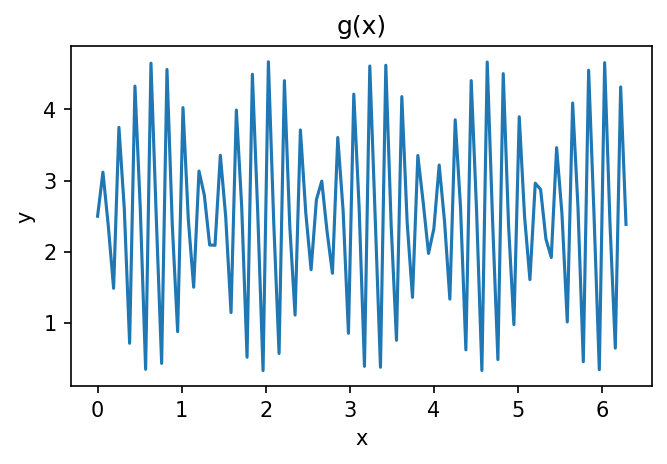

In [113]:
plotxy(x, y, title="g(x)")

In [114]:
print("Mintavételezési frekvencia: %g.\nA két frekvencia közül a nagyobbnak a kétszerese: %g" %
      (fs * 2 *np.pi, 2* np.pi * max(fr) * 2))

Mintavételezési frekvencia: 99.
A két frekvencia közül a nagyobbnak a kétszerese: 125.664


In [115]:
yy = fft.fft(y)
xx = fft.fftfreq(yy.shape[0], 1 / fs)

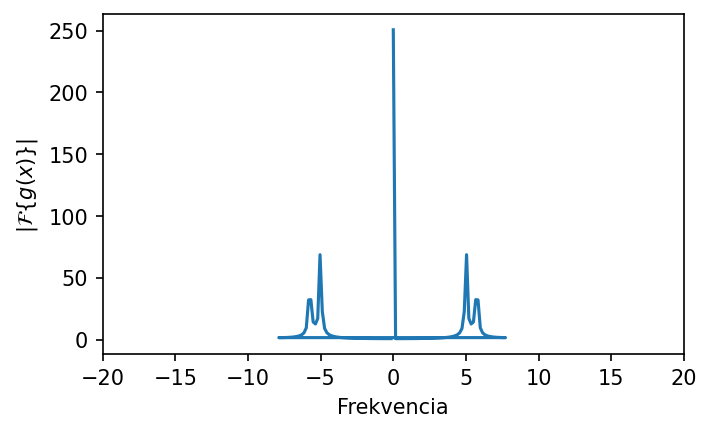

In [116]:
plotxy(xx, np.abs(yy), xlabel="Frekvencia", ylabel=r"$|\mathcal{F}\{g(x)\}|$", xrange=(-20, 20));

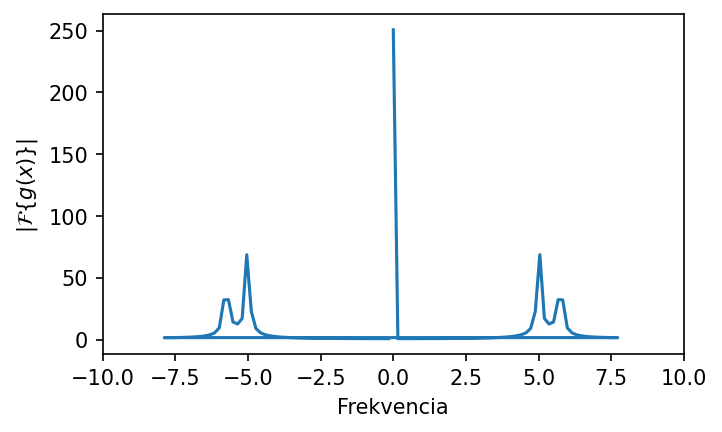

In [117]:
plotxy(xx, np.abs(yy), xlabel="Frekvencia", ylabel=r"$|\mathcal{F}\{g(x)\}|$", xrange=(-10, 10));

In [30]:
fr

array([ 5, 10])

Láthatjuk, hogy ebben az esetben nem sikerült a frekvenci-spektrumot helyreállítani, az alacsony mintavételezési frekvencia következtében a magasabb frekvenciák elvesztek. **Nyquist-tétel**

## Numerikus integrálás

Tekintsünk két példát a numerikus integrálásra.

A scipy-ban két csoportra oszthatóak a numerikus integrálási módszerek:

### Ismert függvény integrálása intervallumon

Ismert az integrálandó függvény, de nem ismert a függvény integrál értéke. Ha rendelkézésre áll egy  függvény, melynek ismerjük a képletét, de nem ismerjük a primitív függvényét, akkor használhetjuk a scipy `quad` függvényét arra, hogy megkapjuk a függvény két érték között integrált értékét.

Egy adatsor numerikus integrálására szükségünk lehet, ha nem tudjuk egy függvény integrálását analitikusan elvégezni vagy egy teszőleges adatsort integrálását kell elvégeznünk.

In [50]:
from scipy import integrate as itg

Először szmítsuk ki egy ismert függvény (proprius) integrálját.

In [52]:
# általános sinus függvény
def sin(x, a, freq, phase):
    return a * np.sin(freq * x + phase)

A szinusz függvényt integrálvaa $0$ és $2 \pi$ között $0$-t kell kapjunk eredménynek.

A `quad` függvény első argumentuma a függvény, amit integrálni szeretnénk. A következő két argumentum az integrálás alsó és felső határa. Az `args` argumentum a függvény további argumentumait jelöli.

Jelen esetben `args=(2.0, 1.0, 0.00)` azt jelenti, hogy
- `a = 2.0`
- `freq = 1.0`
- `phase = 0.0`

In [53]:
itg.quad(sin, 0, 2 * np.pi, args=(2.0, 1.0, 0.00))

(4.443002965025554e-16, 8.799778523569199e-14)

In [54]:
itg.quad(sin, 0, 2 * np.pi, args=(4.0, 1.0, 0.00))

(8.886005930051108e-16, 1.7599557047138398e-13)

In [55]:
itg.quad(sin, 0, 2 * np.pi, args=(4.0, 1.0,  np.deg2rad(30.0)))

(3.4878684980086318e-15, 1.7728018510732708e-13)

In [56]:
x = np.r_[0.0:2 * np.pi:150j]

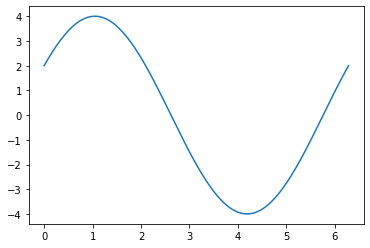

In [57]:
plt.plot(x, sin(x, 4.0, 1.0, np.deg2rad(30.0)))

A függvényt meghívva valóban egy nullához közeli számot kapunk. A kapott második szám az integrálás hibáját tartalmazza.

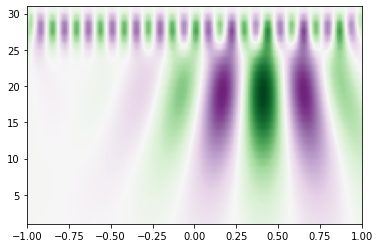

In [30]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

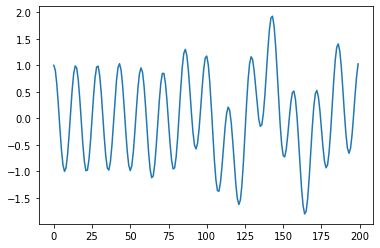

In [34]:
plt.plot(sig)

### Adatsor integrálása

Ha egy egyszerű adatsor áll rendelkezésre több módon is megpróbálkozhatunk az adatsor integrálásával.

#### Integrál kiszámítása függvényillesztéssel

Egy megoldás lehet, ha az adatsorra olyan függvényt illesztünk, melynek tudjuk a primitív függvényét, így egy intervallumra vett integrál értéke triviálisan kiszámítható.

Rövid emlékeztető.

Legyen $f(x)$ valamilyen tetszőleges függvény. $F(x)$ az $f(x)$ függvény primitív függvénye, ha

$$
    \frac{d F(x)}{dx} = f(x)
$$

ekkor

$$
    \int f(x) \, dx = F(x)
$$

és

$$
    \int_a^b f(x) \, dx = F(b) - F(a)
$$

Jó választás lehet $f(x)$-re valamilyen bázisfüggvények, melyeknek ismerjük a primitív függvényeit, lineáris kombinációja.

$$
    f(x) = \sum_n a_n b_n(x)
$$

A legegyszerűbb esetben bázisfüggvénynek választhatjuk az $x$ különböző hatványait ($b_n(x) = x^n$), melyek primitív függvénye jól ismert. Ebben az esetben értelemszerűen az $f(x)$ függvényünk egy polinom lesz.

$$
    \int f(x) = \sum_n \int a_n x^n = c + \sum_n a_n (n + 1)^{-1} x^{n+1} = F(x) = c + \hat{F}(x)
$$

$c$ egy tetszőlegesen választható konstans. Értéke nem releváns proprius integrál kiszámításánal, hiszen:

$$
    \int_a^b f(x) = F(b) - F(a) = [c + \hat{F}(b)] - [c + \hat{F}(a)] = \hat{F}(b) - \hat{F}(a)
$$

így nyugodtan választhatjuk értékét $0$-nak ($c = 0$).

Problémától függően alkalmazhatjuk szinusz és koszinusz függvények lineáris kimbinációját is.

#### Polinomok kezelése

A polinomok rendkívül sok helyen alkalmazhatóak, ezért numpy-ban külön modult hozták létre a kezelésükre. A `poly1d` függvény segítségével hozhatunk létre tetszőleges rendű polinomot.

Hozzuk létre a

$$
    p(x) = 1.1 + 43.1 x + 2.5 x^2
$$

reprezentáló polinomot. Ehhez az $x$ hatványok együtthatóit kell "fordított" (legmagasabb hatványtól kezdve a legalacsonyabb hatványig) sorrendben átadni a `poly1d` függvénynek. 

In [58]:
p1 = np.poly1d((2.5, 43.1, 1.1))
p1

poly1d([ 2.5, 43.1,  1.1])

A polinom képletét ki tudjuk nyomtatni.

In [59]:
print(p1)

     2
2.5 x + 43.1 x + 1.1


A polinom tetszőleges $x$ számnál felvett értékét meg tudjuk kapni:

In [60]:
p1(0.0)

1.1

Ahogy az várható a polinom értékére $x = 0.0$-ban $1.1$-et kaptunk.

A derivált polinomot a `deriv` metódussal tudjuk kiszámítani:

In [62]:
print(p1)
print(p1.deriv())

     2
2.5 x + 43.1 x + 1.1
 
5 x + 43.1


Az integrált polinomot pedig az `integ` metódussal:

In [63]:
p1i = p1.integ()
p1i

poly1d([ 0.83333333, 21.55      ,  1.1       ,  0.        ])

In [64]:
print(p1i)

        3         2
0.8333 x + 21.55 x + 1.1 x


**Figyelem:** Ahogy korábban láttuk az integrálás során egy olyan új polinomot kapunk, melyben egy tetszőlegesen meghatarozható konstans van. Az `integ` metódus ezt a konstanst automatikusan nullának választja és a polinom kinyomtatása során nem írja ki.

A polinom együtthatóit egy vektorban tárolja a polinom objektum, ezeket az objektum `.c` eleme tartalmazza.

In [67]:
p1i.c

array([ 0.83333333, 21.55      ,  1.1       ,  0.        ])

A polinom gyökeit a `.r` elem tartalmazza.

In [68]:
p1i.r

array([-25.80885476,  -0.05114524,   0.        ])

Erről megbizonyosdhatunk, ha kiértékeljük a polinomot a gyökök helyén.

In [65]:
p1i(p1i.r)

array([-9.28376147e-13,  1.13565240e-17,  0.00000000e+00])

In [66]:
p1i(1.0) - p1i(0.0)

23.483333333333334

Valóban $0$-át vagy $0$-hoz közeli értékeket kapunk.

**Gyakorlat:** Illesszünk polinomot egy adatsorra és számítsuk ki az integrál értékét egy intervallumon. Használjuk a numpy `polyfit` függvényét. Számítsuk ki a kapott polinom integrálját a numpy polinom objektumának segítségével.

Vonjuk ki az integrált polinom intervallum végén felvett értékét az intervallum kezdetén felvett értékéből megkapva az intervallumra vett integrál értékét.

Egy függvénnyt, melynek ismerjük a primitív függvényét, mintavételezve összehasonlíthatjuk az illesztéssel kapott intervallumra integrált értéket az ismert értékkel.

#### Adatsor integrálása trapéz módszerrel

Ha nem lehetséges $f(x)$ függvény illesztése az adatsorunkra, akkor használhatjuk a `trapz` függvényt.

A függvény az [összetett húrtrapéz formula](https://hu.wikipedia.org/wiki/Trap%C3%A9zszab%C3%A1ly#%C3%96sszetett_h%C3%BArtrap%C3%A9zformula) segítségével számítja ki az adatsor integráljának értékét.

Számítsuk ki a korábbi szinus függvényünk mintavételezett értékeit.

In [67]:
# x értékek 0 és 2 pi tartományon
x = np.r_[0: 2 * np.pi: 100j]
y = sin(x, a=1.0, freq=1.0, phase=0.0)

In [68]:
itg.trapz(y, x=x)

-1.491862189340054e-16

In [69]:
itg.trapezoid(y, x=x)

-1.491862189340054e-16

Valóban $0$-hoz közeli értéket kapunk úgy mint legutóbb. Ha az adatsorunk mintavételezése egyenlő lépésközzel történt, akkor használhatjuk a `trapz` függvény `dx` opcionális paraméterét, és nem kell megadnunk az $x$ értékeket. Ha sem az $x$, sem a $dx$ paramétert nem határozzuk meg, akkor a függvény feltételezi, hogy az $y$ értékek mintevételezése $1.0$ lépésközzel történt.

**Gyakorlat:** adatsor numerikus integrálása a két fajta módszerrel. 

1. Polinom illesztése az adatsorra, a polinom integrálása a releváns intervallumra.
2. Adatsor integrálása ugyanarra az intervallumra a `trapz` függvény segítségével.

## Interpoláció

A scipy interpolációs modulja az adatok interpolálására tartalmaz jópár függvényt és algoritmust. Röviden ezeket tekintjük át.

Tekintsük át az interpoláció problematikáját. Ismert $n$ darab koordináta $m$-es. Ezeket a koordinatákat jelölje $\mathrm{r}_n$

Általános esetben egy adott koordinátavektor a következőképpen írható fel:

$$
    \mathrm{r} = \begin{bmatrix}
    x_1, & x_2, & x_3, & \dots, & x_m
    \end{bmatrix}
$$

Természetesen a legtöbb esetben 1- vagy 2-dimenzióban dolgozunk, azaz vagy csak egyetlen koordinátánk van $x$, vagy $\mathrm{r} = \begin{bmatrix} x, & y \end{bmatrix}$

Ismertek továbbá $n$ darab $y_n$ értékek, az $\mathrm{r}_n$ koordináták pozíciójában. Kíváncsiak vagyunk a $k$ darab $\mathrm{r'}_k$ koordináta helyén található $y'_k$ értékekre.

Az interpolációs modulban elsősorban három interpolációs eljárás áll rendelkzésünkre. Ezeket ismerhetitek a Matlabból.
- Legközelebbi szomszéd (Nearest Neighbour) 
- Lineáris (Linear)
- Köbös (Cubic)

Először importáljuk az interpolációs modult.

In [11]:
from scipy import interpolate as intp
import numpy as np
import matplotlib.pyplot as plt

### A `griddata` függvény

Az interpolációs modul egyik fő függvénye a `griddata` függvény. Lássunk egy példát, interpoláljuk a Gauss függvény értékeit 2-dimenzióban. A függvény képlete:

$$ f(x, y) =  \exp\left(-\frac{(x - \mu_x)^2}{\sigma_x} - \frac{(y - \mu_y)^2}{\sigma_y}\right) $$

Python-ban implementálva:

In [3]:
def gauss(x, y, mean=(0.0, 0.0), sigma=(1.0, 1.0)):
    return np.exp(-((x - mean[0])**2 / sigma[0] + (y - mean[1])**2 / sigma[1]))

Határozzuk meg a várható értékeket és szórásokat, amikkel dolgozni fogunk. Ezzeh használjuk fel a `functools` modul `partial` függvényét. Ez a függvény egy adott másik függvény bizonyos paraméterinek értékét úgymond "befagyasztja".  

In [4]:
import functools as ft

In [5]:
mean, sigma = (3.0, 4.0), (2.0, 5.0) 

In [6]:
gauss_spec = ft.partial(gauss, mean=mean, sigma=sigma)

A `gauss_spec` új függvénynek már csak az x és y értékeket kell átadnunk a `mean` és `sigma` argumentumok értéke fixálva lett. Ezt ellenőrizhetjük:

In [7]:
gauss(0.1, 2.5, mean=(3.0, 4.0), sigma=(2.0,5.0))

0.00951391324196363

In [8]:
gauss_spec(0.1, 2.5)

0.00951391324196363

Generáljunk $x$ és $y$ koordinátákat.

In [17]:
m, s = mean[0], sigma[0]
x = np.random.rand(500) * s + (m - (s / 2.0))

m, s = mean[1], sigma[1]
y = np.random.rand(500) * s + (m - (s / 2.0))

f = gauss_spec(x, y)

Rajzoljuk ki az $x$ és $y$ értékek helyén kiértékelt Gauss függvényünk értékeit. A matplotlib `scatter` függvénye erre ideális. A függvény `c` opcionális argumentumának egy vektort adhatunk át, melynek elemeinek száma megegyezik a koordinátavektorok elemeinek számával.

Ekkor a koordináták helyét nem csak egy adott szimbólummal rajzolja ki a függvény, hanem a kooridnátához tartozó skalár értéket is megjeleníti valamilyen színskála segítségével. Most használjuk a matplotlib alap színskáláját.

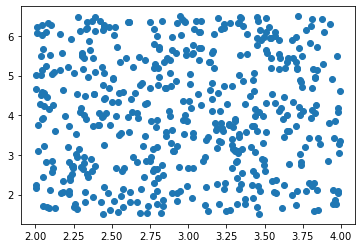

In [12]:
plt.scatter(x=x, y=y);

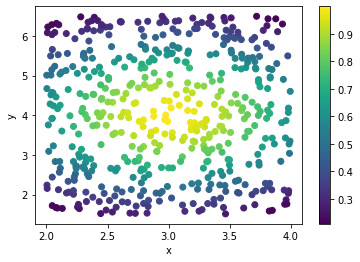

In [15]:
plt.scatter(x=x, y=y, c=f)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y");

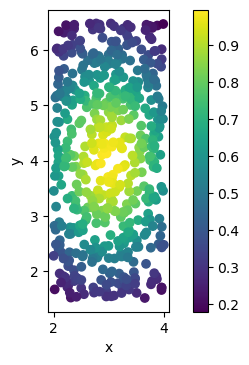

In [26]:
F, ax = plt.subplots(dpi=100)
im = ax.scatter(x=x, y=y, c=f)
plt.colorbar(im)
ax.set_xlabel("x")
ax.set_ylabel("y");
ax.set_aspect("equal")

In [20]:
mean, sigma

((3.0, 4.0), (2.0, 5.0))

### Grid-ek készítése

Az interpoláláshoz érdemes úgynevezett grid-et használnunk. Legegyszerűbb esetben az $x$ és $y$ koordinátaértékeket egy vektorban tárolhatjuk. Sok esetben hasznos az $x$ és $y$ koordinátákat mátrix formátumban tárolni bizonyos műveletek elvégzéséhez.

Ha tehát van $x_j$ $n$ darab $x$ koordinátaértéket és $y_i$ $m$ darab $y$ koordinátaértéket tartalmazó vektorunk, akkor a koordinátamátrixok a következőképpen allíthatóak elő:

$$
    X_{ij} = x_j
$$

és 

$$
    Y_{ij} = y_i
$$

ahol $i \in [1,m]$ és $j \in [1, n]$.

A numpy-ban az `mgrid` objektum segítségével állíthatunk elő grid-eket.

In [27]:
gy, gx = np.mgrid[5:0:-1, 0:6]

In [28]:
print("x: \n", gx)
print("y: \n", gy)

x: 
 [[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]
y: 
 [[5 5 5 5 5 5]
 [4 4 4 4 4 4]
 [3 3 3 3 3 3]
 [2 2 2 2 2 2]
 [1 1 1 1 1 1]]


In [29]:
res = np.zeros((5, 6))

In [30]:
%%timeit
for ii, x in enumerate(range(0, 6)):
    for jj, y in enumerate(range(1, 6)):
        res[jj, ii] = gauss_spec(x, y)

105 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [31]:
res

array([[0.0018363 , 0.02237077, 0.10025884, 0.16529889, 0.10025884,
        0.02237077],
       [0.00499159, 0.06081006, 0.27253179, 0.44932896, 0.27253179,
        0.06081006],
       [0.00909528, 0.11080316, 0.4965853 , 0.81873075, 0.4965853 ,
        0.11080316],
       [0.011109  , 0.13533528, 0.60653066, 1.        , 0.60653066,
        0.13533528],
       [0.00909528, 0.11080316, 0.4965853 , 0.81873075, 0.4965853 ,
        0.11080316]])

In [32]:
%%timeit
res_grid = gauss_spec(gx, gy)

17.8 µs ± 343 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [34]:
res_grid = gauss_spec(gx, gy)

In [35]:
np.flipud(res_grid)

array([[0.0018363 , 0.02237077, 0.10025884, 0.16529889, 0.10025884,
        0.02237077],
       [0.00499159, 0.06081006, 0.27253179, 0.44932896, 0.27253179,
        0.06081006],
       [0.00909528, 0.11080316, 0.4965853 , 0.81873075, 0.4965853 ,
        0.11080316],
       [0.011109  , 0.13533528, 0.60653066, 1.        , 0.60653066,
        0.13533528],
       [0.00909528, 0.11080316, 0.4965853 , 0.81873075, 0.4965853 ,
        0.11080316]])

Interpoláljuk a korábban random $x,y$ koordinátákon meghatározott Gauss függvény értékeket egy gridre. Ehhez írjunk egy függvényt:

In [36]:
def plot_intp(axe, x, y, f, method, gx, gy, **kwargs):
    # egy mátrixot fogunk visszakapni az interpolált értékekkel
    interpol = intp.griddata((x, y), f, (gx, gy), method=method)

    # x, y koordináták tartománya
    extent = (x.min(), x.max(), y.min(), y.max())
    
    # az imshow metódussal lehet mátrix értékeket megjeleníteni
    im = axe.imshow(
        interpol.T,    # a kapott mátrixot transzponálni kell
        extent=extent, # az x és y értékek tartománya
        origin='lower', # bal alsó saroktól kezdődjenek a koordináták
        **kwargs
    )

    # átláthatóság kedvéért a képarány megváltoztatása
    axe.set_aspect(0.5)
    axe.set_title(method)
    axe.set_xlim(extent[0], extent[1])
    axe.set_ylim(extent[2], extent[3])

    axe.set_xlabel("x")

In [37]:
m, s = mean[0], sigma[0]
x = np.random.rand(500) * s + (m - (s / 2.0))

m, s = mean[1], sigma[1]
y = np.random.rand(500) * s + (m - (s / 2.0))

extent = (x.min(), x.max(), y.min(), y.max())

gy, gx = np.mgrid[
    extent[2]:extent[3]:50j,
    extent[0]:extent[1]:50j,
]

f = gauss_spec(x, y)

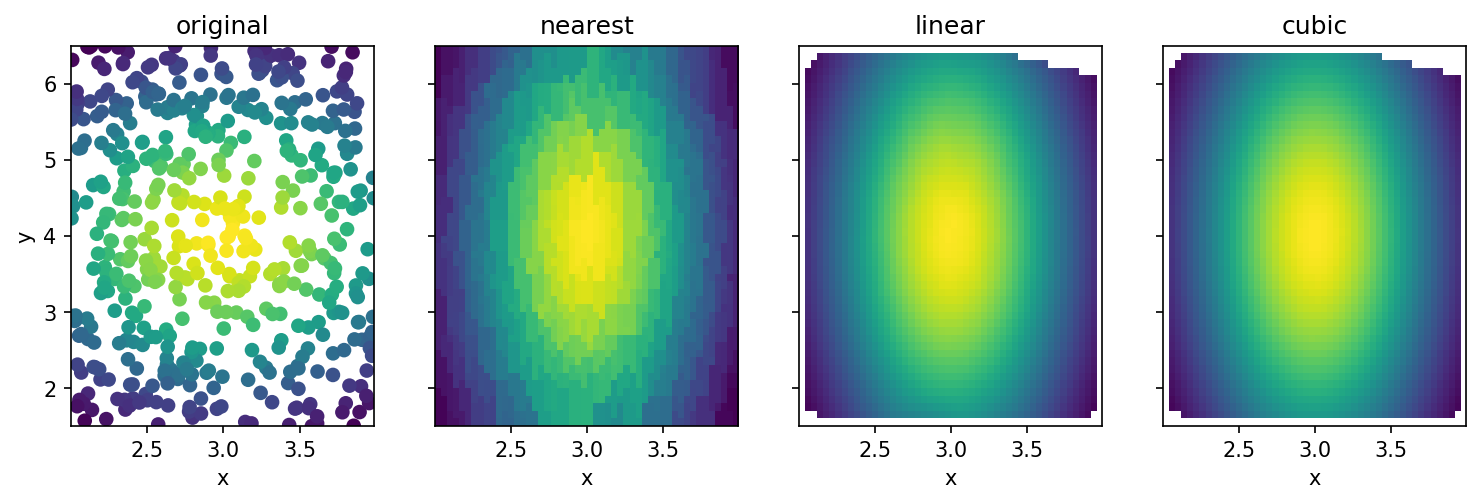

In [40]:
methods = ("nearest", "linear", "cubic")
vmin, vmax = f.min(), f.max()
# al ábrák készítése
fig, axes = plt.subplots(
    nrows=1, # 1 sor
    ncols=4, # 2 oszlop
    sharey=True, # y tengely közös használata
    dpi=150,
    figsize=(12,5),
)

axe = axes[0]
axe.scatter(x, y, c=f, vmin=vmin, vmax=vmax)
axe.set_aspect(0.5)
axe.set_xlim(extent[0], extent[1])
axe.set_ylim(extent[2], extent[3])
axe.set_ylabel("y")
axe.set_xlabel("x")
axe.set_title("original")

for axe, method in zip(axes[1:].ravel(), methods):
    plot_intp(axe, x, y, f, method, gx, gy,
              vmin=vmin, # színskála beszórítása eredeti minimum
              vmax=vmax  # és maximum értékek közé
             )
    

In [43]:
import sys
sys.path.append("/home/istvan/packages/src/github.com/bozso/python_course/modules")
import plot

In [49]:
import importlib as imp
imp.reload(plot);

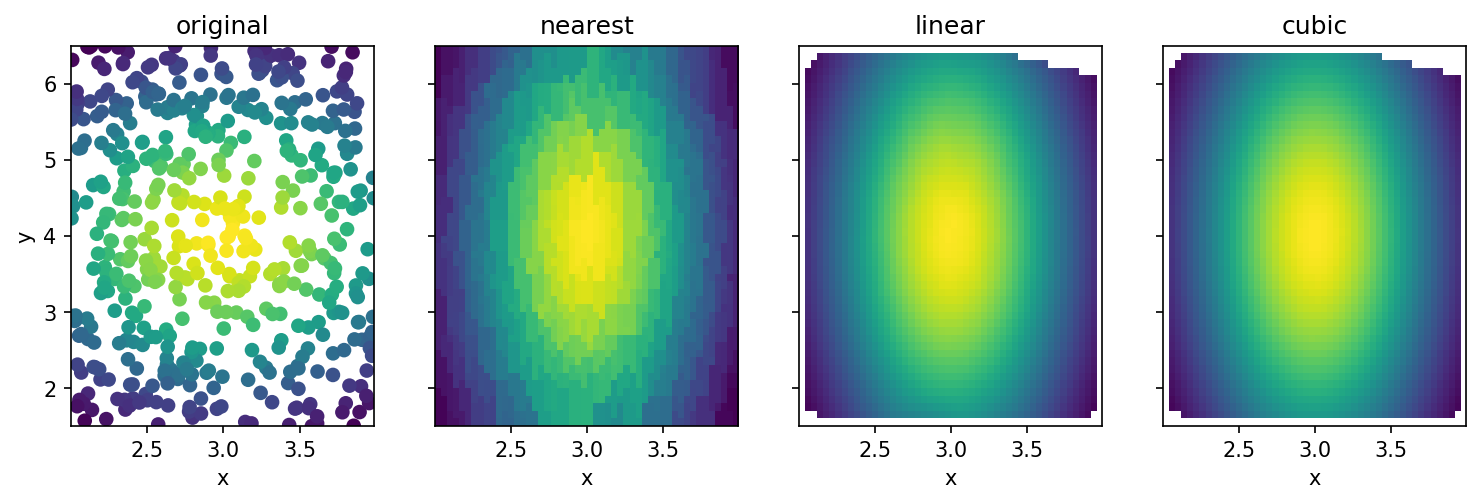

In [44]:
methods = ("nearest", "linear", "cubic")
vmin, vmax = f.min(), f.max()
# al ábrák készítése
fig, axes = plt.subplots(
    nrows=1, # 1 sor
    ncols=4, # 2 oszlop
    sharey=True, # y tengely közös használata
    dpi=150,
    figsize=(12,5),
)

axe = axes[0]
axe.scatter(x, y, c=f, vmin=vmin, vmax=vmax)
axe.set_aspect(0.5)
axe.set_xlim(extent[0], extent[1])
axe.set_ylim(extent[2], extent[3])
axe.set_ylabel("y")
axe.set_xlabel("x")
axe.set_title("original")

for axe, method in zip(axes[1:].ravel(), methods):
    plot.interpolate_and_plot(axe, x, y, f, method, gx, gy,
              vmin=vmin, # színskála beszórítása eredeti minimum
              vmax=vmax  # és maximum értékek közé
             )
    

In [50]:
plot.test()

test


Látható a kölünböző interpolációs módszerek közötti különbség. A legközelebbi szomszéd esetén az algoritmus bármely koordinára elvégzi az interpolációt, a lineáris és köbös módszerekkel ellentétben, melyek esetén csak az eredeti koordináták által befoglalt koordinátákhoz történik az interpoláció.

Általában elmondható, hogy a köbös interpolációval előállított értékek sokkal "simábbak" és az interpolált értékek a köbös esetben állnak legközelebb az eredeti függvényértékekhez. A köbös interpoláció viszont számításigényesebb mint a lineáris.

A lineáris talán a leghatékonyabb interpoláció pontosság és számításigényesség szempontjából.

A legközelebbi szomszéd elvén alapuló interpoláció akkor lehet hasznos, ha meg kell tartanunk az eredeti értékek halmazát. Abban az esetben, ha egész számokat interpolálunk és az interpoláció után is egész számokat szeretnénk kapni, nem érdemes lineáris vagy köbös interpolációt használni.

A következő fejezetben megismerkedünk az objektum orientált programozás alapjaival.

PyCharm
Visual Studio Code - VSCode